<a href="https://colab.research.google.com/github/cardstdani/linalg/blob/main/TF_Linalg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Modules installation and Setup**

The following cells are reserved for the installation of the necesary modules along the rest of following Notebook operations.<br> -To properly configure the **execution runtime**, please execute one by one the next cluster of cells. <br>Note that one of them restarts the environment, so you may have to wait a few seconds before running the next cell.

In [ ]:
%%capture
!pip install ipympl
get_ipython().kernel.do_shutdown(True)

**Setup**

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import tensorflow as tf
import numpy as np
import random
%matplotlib widget
matplotlib.interactive(True)

In [ ]:
print(tf.__version__)

2.8.2


In [ ]:
#Only use this line to close all opened figures
plt.close('all')

##**Scalars, Vectors, and the first dimensions**

<div class="markdown-google-sans">
  <h1><b>0 dimension $\mathbb {R^0}$</b></h1>

If we first take a look at the first possible space dimension, we will find that everything existing in it is condensed into a fixed <b>point</b>.

  We can consider the represented point as a <b>scalar</b> value since it contains a numeric parameter <i>(int32, float64, double, complex128...)</i>

$V=scalarValue$.
</div>

In [ ]:
#@title `Show/Hide code` { run: "auto" }

scalar = 90 #@param {type:"number"}
numericType = "quint16" #@param ['bfloat16', 'bool', 'cast', 'complex', 'complex128', 'complex64', 'double', 'float16', 'float32', 'float64', 'half', 'int16', 'int32', 'int64', 'int8', 'qint16', 'qint32', 'qint8', 'quint16', 'quint8', 'resource', 'saturate_cast', 'string', 'uint16', 'uint32', 'uint64', 'uint8', 'variant']

tensorType = eval("tf."+numericType)
try:
  t = tf.constant(scalar, dtype=tensorType)
  print(t)
except Exception as e:
  print(e)

tf.Tensor(90, shape=(), dtype=quint16)


<div class="markdown-google-sans">
  <h1><strong>1 dimension</strong></h1>

In the first dimension, we can represent the scalar quantity of the previous dimension as a <b>point</b> in a line. 

Thus, considering the origin at value <b>[0]</b>, a vector of 1 dimension is an object with only one <b>axis component</b> <i>(coordinate)</i> which stands for the distance between origin and scalar point. 

$V=[scalarValueX] \in \mathbb{R}^1$.
</div>

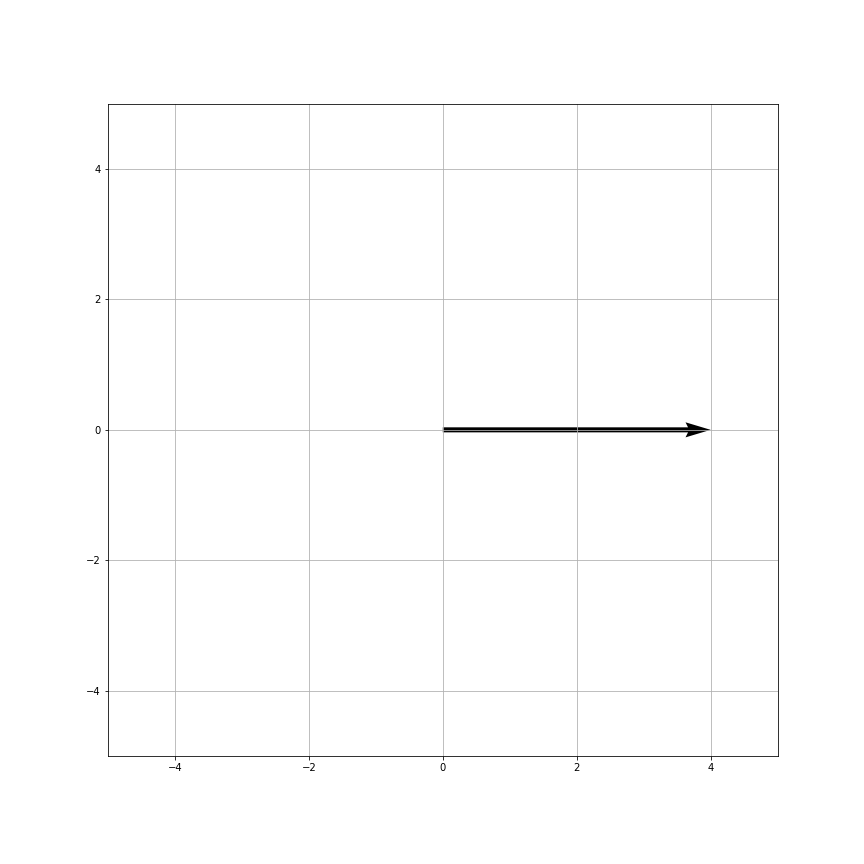

In [ ]:
#@title `Show/Hide code` { run: "auto" }

vectorValue = "[4]" #@param {type:"string"}
color = "000000" #@param {type:"string"}

t = tf.constant(eval(vectorValue))

fig = plt.figure(figsize=(12, 12))
plt.quiver(t, 0, angles='xy', scale_units='xy', scale=1, color="#"+color)

l = np.max(t)+1
plt.xlim([-l, l])
plt.ylim([-l, l])
plt.grid()
plt.show()

<div class="markdown-google-sans">
  <h1><strong>2 dimension</strong></h1>

In the second dimension, the vector now has 2 components, one for the horizontal axis and another one for the vertical axis. 

The combination of these components results in an object capable of placing a point in a plane 2d space. To achieve this, the vector object contains two scalar values for the respective axes, instead of only one.
<br><br>
$V=[scalarValueX, scalarValueY] \in \mathbb{R}^2$

* scalarValueX=Horizontal distance from origin to point

* scalarValueY=Vertical distance from origin to point
</div>

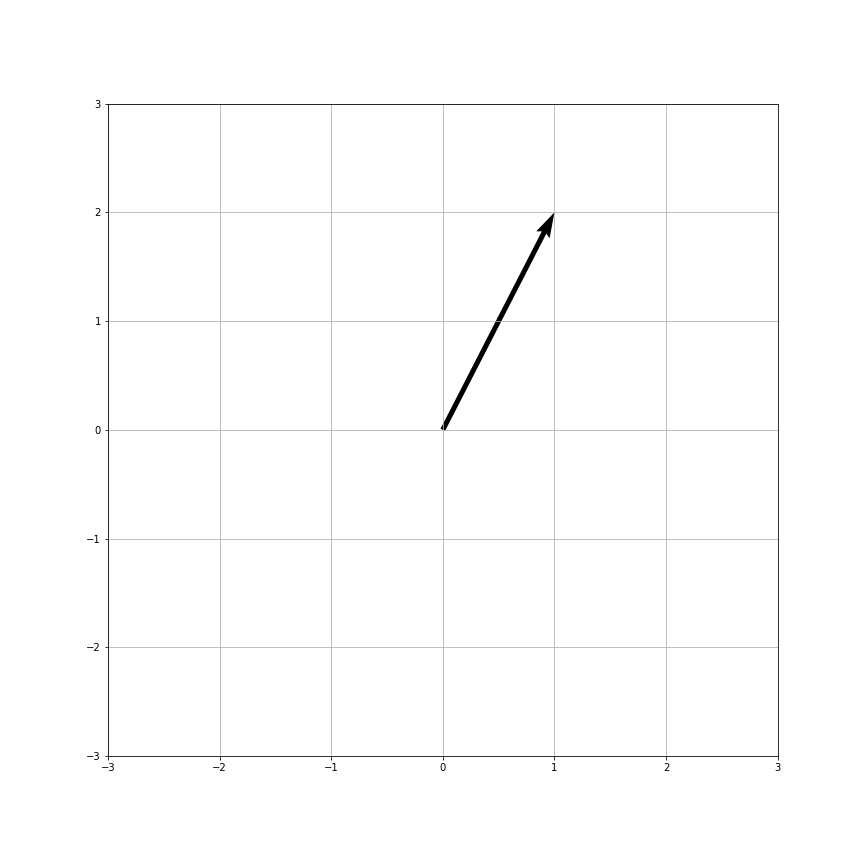

In [ ]:
#@title `Show/Hide code` { run: "auto" }

vectorValue = "[1, 2]" #@param {type:"string"}
color = "000000" #@param {type:"string"}

t = tf.constant(eval(vectorValue))

fig = plt.figure(figsize=(12, 12))
plt.quiver(0, 0, t[0], t[1], angles='xy', scale_units='xy', scale=1, color="#"+color)

l = np.max(t)+1
plt.xlim([-l, l])
plt.ylim([-l, l])
plt.grid()
plt.show()

<div class="markdown-google-sans">
  <h1><strong>3 dimension</strong></h1>

Finally, with 3 dimensions, the vector has one additional component concerning the previous example. 
<br><br>
$V=[scalarValueX, scalarValueY, scalarValueZ] \in \mathbb{R}^3$

* scalarValueX=Horizontal distance from origin to point
* scalarValueY=Vertical distance from origin to point
* scalarValueZ=Depth distance from origin to point
</div>

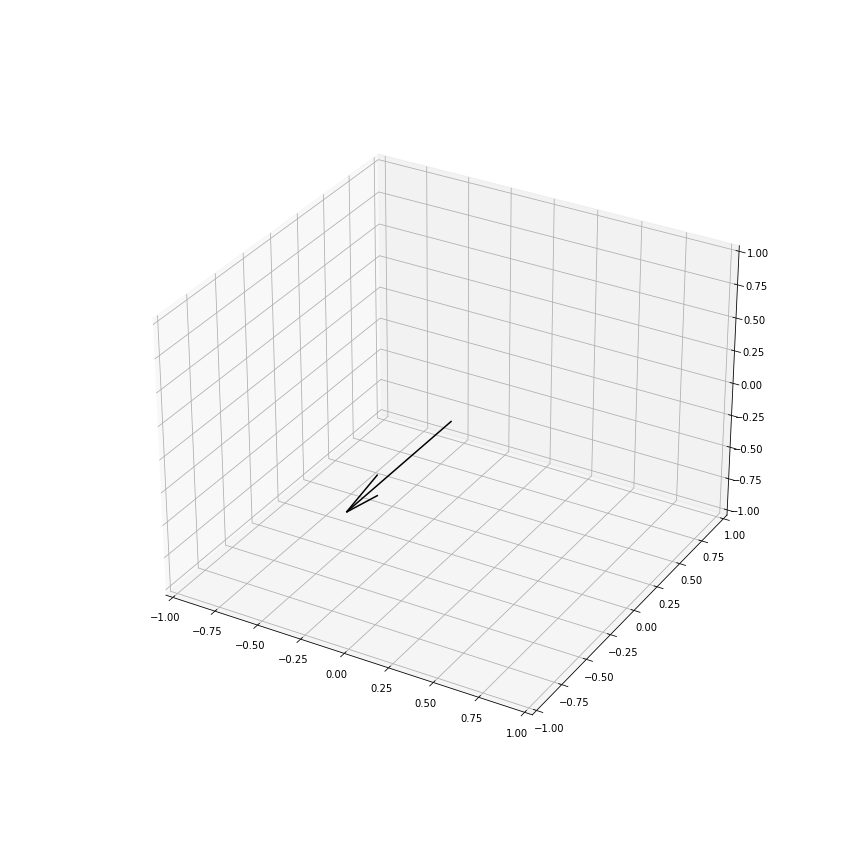

In [ ]:
#@title `Show/Hide code` { run: "auto" }

vectorValue = "[0, -1, 0]" #@param {type:"string"}
color = "000000" #@param {type:"string"}

t = tf.constant(eval(vectorValue))

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.quiver(0, 0, 0, t[0], t[1], t[2], color="#"+color)

l = np.max(t)+1
ax.set_xlim([-l, l])
ax.set_ylim([-l, l])
ax.set_zlim([-l, l])
ax.grid()
plt.show()

<div class="markdown-google-sans">
  <h1><strong>n-dimension $\mathbb{R}^n$</strong></h1>

Since we can only visualize the first 3 dimensions in a simple way, we will leave the rest of them for the mathematical representation as a <b>tensor</b> object.
<br><br>
$V=[scalarValueD1, scalarValueD2, scalarValueD3, ...., scalarValueDn] \in \mathbb{R}^n$

* scalarValueDn=N-axis distance from origin to point in n-dimensional space ${R}^n$
</div>

In [ ]:
#@title `Show/Hide code` { run: "auto" }

vectorValue = "[1, 2, 3, 1, 8, 9, 9, 9, 9]" #@param {type:"string"}

t = tf.constant(eval(vectorValue))

print(t)

tf.Tensor([1 2 3 1 8 9 9 9 9], shape=(9,), dtype=int32)


<div class="markdown-google-sans">
  <h1><strong>Matrix, Tensors, and multidimensional objects</strong></h1>

---

Now we are capable of representing a point in <b>n-space</b> with a series of scalar values contained inside a vector object of the corresponding <b>n-space</b> $(\mathcal{R}^n)$

But, to properly understand what a Tensor object is, we must first consider a <i>"bigger"</i> structure which allows us to group, cluster, or just store multiple vectors inside a single instance of it. This <i>"bigger"</i> structure is referred to as <b>Matrix</b> and in short words, it's basically <b><i>another vector that contains vectors instead of scalar values.</i></b>

$M=[Vector0, Vector1, Vector2,.....,VectorN] \in \mathcal{M}_{n \times m}$

* $n$=Number of vectors<i>(components)</i> of the matrix
* $m$=Length of every single vector<i>(component)</i> of the matrix
* $\mathcal{M}_{n \times m}$=Set of all matrices sharing the same parameters $n$ and $m$

<br>

<b>Another ways of visualizing matrices are the following:</b>
---
* Arbitrary vector $V_k=[scalarX, scalarY, scalarZ]_k$ <i>(Note that in this example we will only use 3d-vectors, but in another framework they can be as large as required)</i>
* $M=[[scalarX, scalarY, scalarZ]_0, [scalarX, scalarY, scalarZ]_1,........,[scalarX, scalarY, scalarZ]_n] \in \mathcal{M}_{n \times m}$

* $M=[[scalarX, scalarY, scalarZ]_0,\\ \quad\quad [scalarX, scalarY, scalarZ]_1, \\\quad\quad........,\\\quad\quad [scalarX, scalarY, scalarZ]_n] \in \mathcal{M}_{n \times m}$
</div>


M=[[2 1 0]
 [0 1 0]
 [0 0 1]]
 tf.Tensor(
[[2 1 0]
 [0 1 0]
 [0 0 1]], shape=(3, 3), dtype=int32)


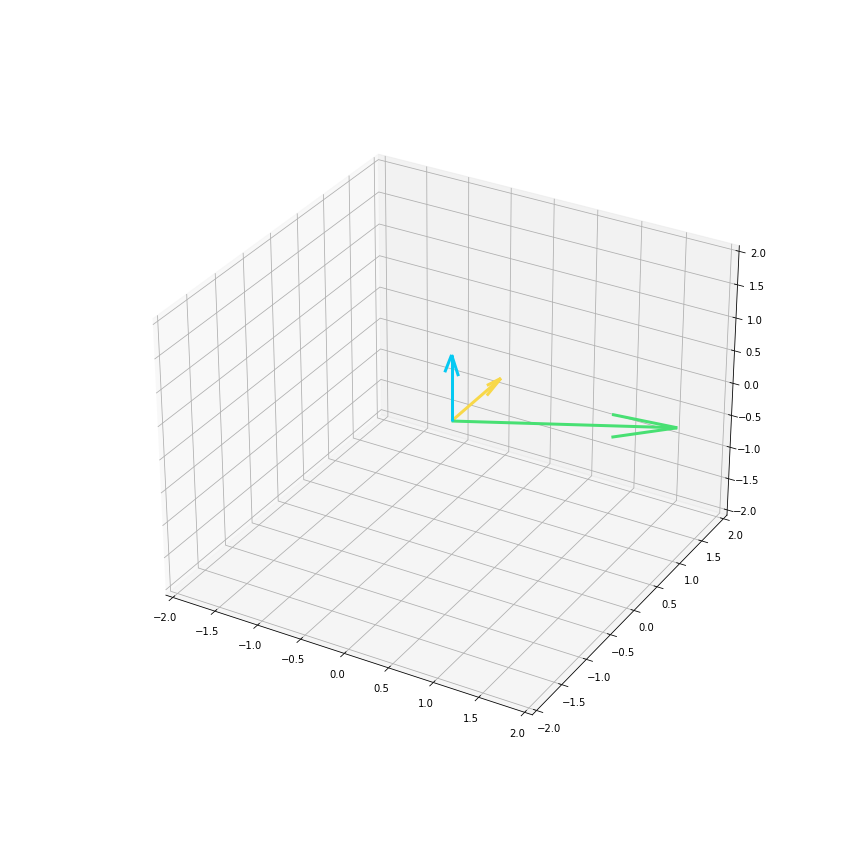

In [ ]:
#@title `Show/Hide code` { run: "auto" }
inputMatrix = "[[2, 1, 0], [0, 1, 0], [0, 0, 1]]" #@param {type:"string"}
matrix = tf.constant(eval(inputMatrix))
colors = ["#48e073", "#f8d849", "#05c9f2"]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

for i in range(len(matrix)):
  ax.quiver(0, 0, 0, matrix[i][0], matrix[i][1], matrix[i][2], arrow_length_ratio=0.3, lw=3, color=colors[i]) 

l = np.max(matrix)
ax.set_xlim([-l, l])
ax.set_ylim([-l, l])
ax.set_zlim([-l, l])
print(f"M={matrix}\n", matrix)

<div class="markdown-google-sans">

For visualizing purposes, we considered each entry<i>(row)</i> of a matrix as a vector. However, in practical uses it's usual to see each one of its <b>columns</b> as a vector.

To convert a row vector matrix into a column matrix vector, there exists an operation known as <b>Transposition</b>, which will help us performing this task.

* $M=[[scalarX, scalarY, scalarZ]_0,\\ \quad\quad [scalarX, scalarY, scalarZ]_1, \\\quad\quad........,\\\quad\quad [scalarX, scalarY, scalarZ]_n] \in \mathcal{M}_{n \times m}$
* $ M^t=[[\overbrace{scalarX_0}^{V_0},\overbrace{scalarX_1}^{V_1},.....,\overbrace{scalarX_n}^{V_n}],\\ \quad\quad\>\>\> [scalarY_0, scalarY_1,....., scalarY_n], \\\quad\quad\>\>\> [scalarZ_0, scalarZ_1,....., scalarZ_n]] \in \mathcal{M}_{m \times n}$
* $M^t$ is the <b>Transposed</b> matrix of $M$

Both represent the same vectors, but one of them operates on rows, and the other one on columns.
</div>

M=[[2 1 0]
 [0 1 0]
 [0 0 1]]

Transposed M=[[2 0 0]
 [1 1 0]
 [0 0 1]]



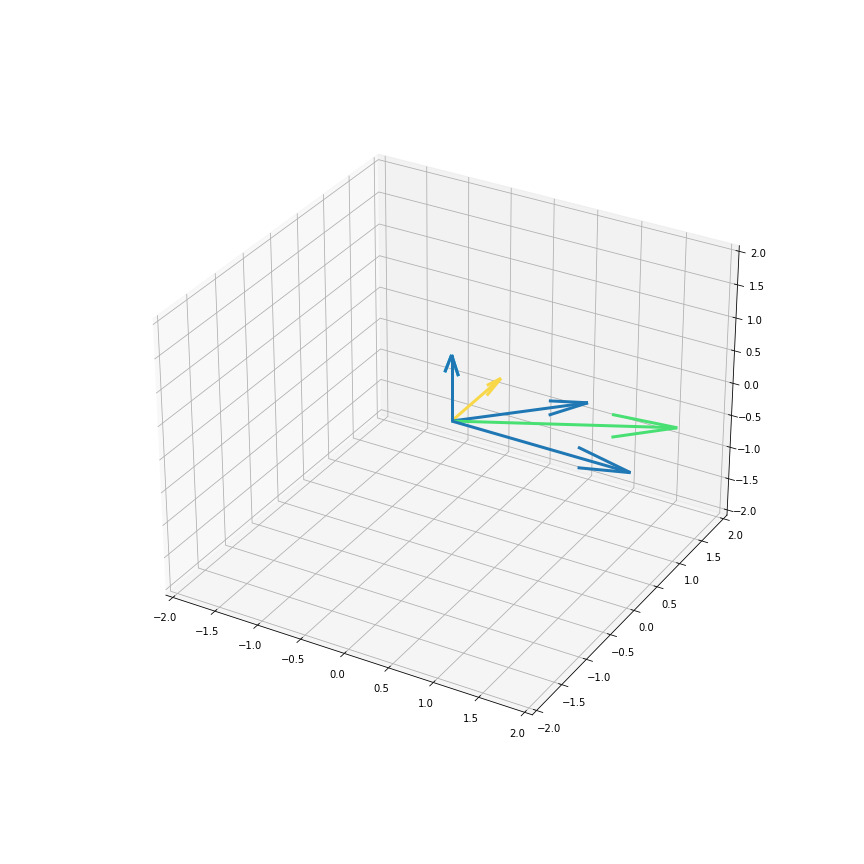

In [ ]:
#@title `Show/Hide code` { run: "auto" }
inputMatrix = "[[2, 1, 0], [0, 1, 0], [0, 0, 1]]" #@param {type:"string"}
matrix = tf.constant(eval(inputMatrix))
colors = ["#48e073", "#f8d849", "#05c9f2"]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

for i in range(len(matrix)):
  ax.quiver(0, 0, 0, matrix[i][0], matrix[i][1], matrix[i][2], arrow_length_ratio=0.3, lw=3, color=colors[i]) 

print(f"M={matrix}\n")
matrix = tf.transpose(matrix)
for i in range(len(matrix)):
  ax.quiver(0, 0, 0, matrix[i][0], matrix[i][1], matrix[i][2], arrow_length_ratio=0.3, lw=3) 

l = np.max(matrix)
ax.set_xlim([-l, l])
ax.set_ylim([-l, l])
ax.set_zlim([-l, l])
print(f"Transposed M={matrix}\n")

<div class="markdown-google-sans">
<h1><strong>What is a Tensor?</strong></h1>

After having reviewed matrices, we can introduce Tensors by performing the same process we did with vectors to get matrices.

With that in mind, and regarding official definitions, we can start with the assumption that <b><i>a Tensor is a multidimensional matrix</i></b>.

---

* Arbitrary Matrix $M_i \in \mathcal{M}_{m\times n}$
* $T=[M_0, M_1, M_2,....,M_n]$

As you can see in the previous example, the tensor $T$ has an $m\times n$ matrix in each of its entries. Thus, since the matrix already contains vectors as entries, we can observe that a tensor has a higher order of <i>"dimensionality"</i> than a single matrix object. That parameter is known as <b>Tensor's rank</b> and turns out to be an extension of the concept of <b>Matrix rank</b> which we will see later.

To understand what the rank of a Tensor actually is, we need to first give its definition; So, according to tensorflow documentation, it's <b>the number of indices required to uniquely select each element of the tensor</b>.

However, to reach the underlying principle supporting this concept, let's look at several examples and visualizations of Tensors and their rank:

---

* Rank 0 → $T=scalarValue$ 

In this case, we need 0 index values to reach an element of this Tensor, due it's only made of 1 unique entry
* Rank 1 → $T=[scalarValue0, scalarValue1,....,scalarValueN]$ <i>(Note the similarity with a vector)</i>

When the rank of a tensor is 1, we need one index value to locate an arbitrary element of it. So, if we want to reach the $i$ element, we will only use one index with value $i$. 
* Rank 2 → $T=[\overbrace{[scalarValue0,....,scalarValueM]}^{V_0},....,\overbrace{[scalarValue0,....,scalarValueM]}^{V_n}]$  <i>(Note the similarity with a matrix)</i>

Here, with rank 2, we need two index values to locate a certain element of the Tensor. The first one to determine the entry and the second one to specify the position inside the own entry, which in this case is a vector and a single index is enough to locate an arbitrary element in it. 
* Rank 3 → $T=[\overbrace {[\overbrace{[scalarValue0,....,scalarValueM]}^{V_0},....,\overbrace{[scalarValue0,....,scalarValueM]}^{V_n}]}^{M_0},\overbrace {[\overbrace{[scalarValue0,....,scalarValueM]}^{V_0},....,\overbrace{[scalarValue0,....,scalarValueM]}^{V_n}]}^{M_1},....,\overbrace {[\overbrace{[scalarValue0,....,scalarValueM]}^{V_0},....,\overbrace{[scalarValue0,....,scalarValueM]}^{V_n}]}^{M_i}]$

When the rank is greater than or equal to three, there isn't a special name as <b>scalar, vector or matrix</b>. Tensors with rank $\ge3$ are just refered to as Tensors. In the above example, you can observe a rank 3 Tensor in which each entry has a matrix $M_j$. To understand its structure, and rank as key parameter, we must highlight the required number of indexes to locate a certain element inside the Tensor object. 

First, we will need one to select the matrix containing it. Once inside that matrix, we will also need two more as seen in the rank 2 example. Finally, the balance ends with 3 indexes matching the Tensor rank value property.
</div>

In [ ]:
#@title `Show/Hide code` { run: "auto" }
inputTensor= "[[[2, 1, 0], [0, 1, 0], [0, 0, 1]], [[2, 1, 0], [0, 1, 0], [0, 0, 1]]]" #@param {type:"string"}
tensor = tf.constant(eval(inputTensor))

print(tensor, f"\nRank={tensor.ndim}")

tf.Tensor(
[[[2 1 0]
  [0 1 0]
  [0 0 1]]

 [[2 1 0]
  [0 1 0]
  [0 0 1]]], shape=(2, 3, 3), dtype=int32) 
Rank=3


<div class="markdown-google-sans">
<h1><strong>Tensor shape</strong></h1>

Another interesting and useful parameter of Tensors is their <b>shape</b>. 

As you can see previously, the tensor $T=[[[2, 1, 0], [0, 1, 0], [0, 0, 1]], [[2, 1, 0], [0, 1, 0], [0, 0, 1]]]$ has a shape of $(2, 3, 3)$

Visually, that means the object has <b>2</b> entries, each entry has its <b>3</b> respective <i>"sub-entries"</i>, and each one of this <i>"sub-entries"</i> has <b>3</b> elements. If you desire to calculate the total amount of tensor elements, you just need to multiply all shape values. 

Additionally, by using this property you are able to <b>reshape</b> the Tensor<i>(if possible)</i>, changing its internal structure depending on its future purposes and use cases.
</div>

<div class="markdown-google-sans">
<h1><strong>Vector and Matrix operations</strong></h1>

The three main operations we need to consider to start working with Tensors <i>(Vectors and Matrices in this case)</i> are <b>multiplication by scalar, summation and binary product.</b>

---

<h2><b>Vectors</b></h2>

Multiplicating a vector by a scalar value is useful when we want to manipulate the magnitude of that vector. So, to achieve this result, the operation is defined as the product of the scalar by all its components as follows:

* $V=[a_0, a_1, a_2, a_3,....,a_n] : a_i\in \mathcal{R}$ <i>(now we will denote scalar values as $a_i$)</i>
* $\lambda V=[\lambda a_0, \lambda a_1, \lambda a_2, \lambda a_3,....,\lambda a_n] : \lambda \in \mathcal{R}$
</div>

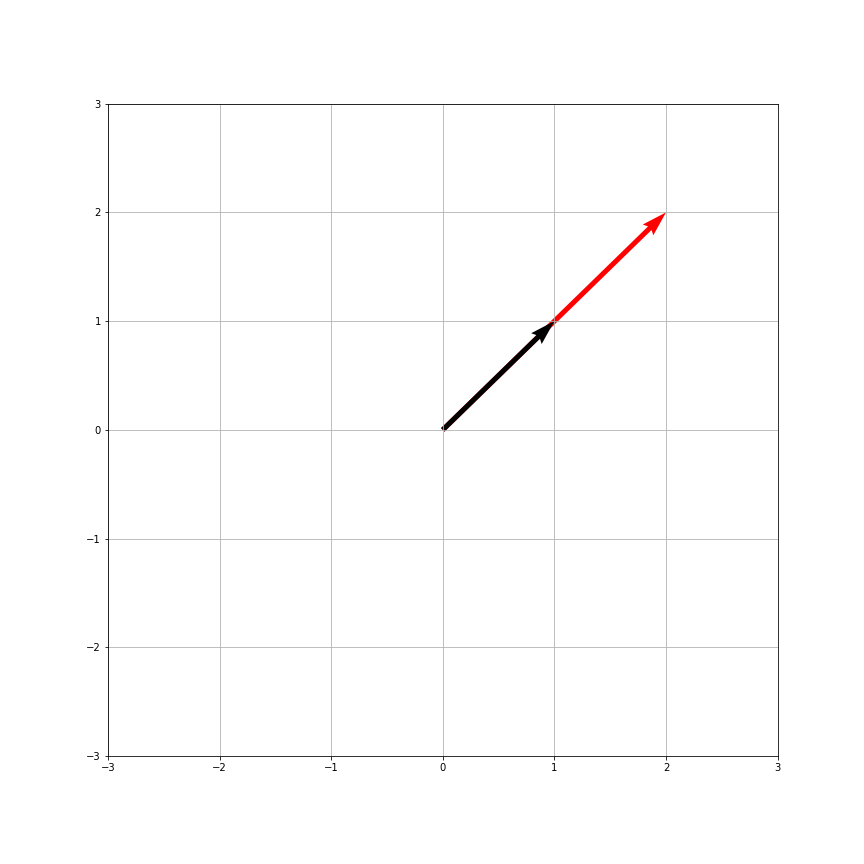

In [ ]:
#@title `Show/Hide code` { run: "auto" }

vectorValue = "[1, 1]" #@param {type:"string"}
scalarValue = "2" #@param {type:"string"}
color = "000000" #@param {type:"string"}

t = tf.constant(eval(vectorValue), dtype=tf.float64)

fig = plt.figure(figsize=(12, 12))
plt.quiver(0, 0, t[0], t[1], angles='xy', scale_units='xy', scale=1, color="#"+color)

t = tf.multiply(t, eval(scalarValue))
plt.quiver(0, 0, t[0], t[1], angles='xy', scale_units='xy', scale=1, color="#ff0000", zorder=0)

l = np.max(t)+1
plt.xlim([-l, l])
plt.ylim([-l, l])
plt.grid()
plt.show()

<div class="markdown-google-sans">

In second place, we can also add vectors altogether to get a new vector as result.

This time, the operation is carried out element wise between the corresponding values of vectors being added. Their are only required to have the same number of elements or entries to be summable.

* $V=[a_0, a_1, a_2, a_3,....,a_n], W=[b_0, b_1, b_2, b_3,....,b_n]$
* $V+W=[a_0+b_0, a_1+b_1, a_2+b_2, a_3+b_3,...., a_n+b_n]$

As you can see in the below plot, the respective components are added graphically to build the resulting vector, leading to the <b>Triangle law</b>.
</div>

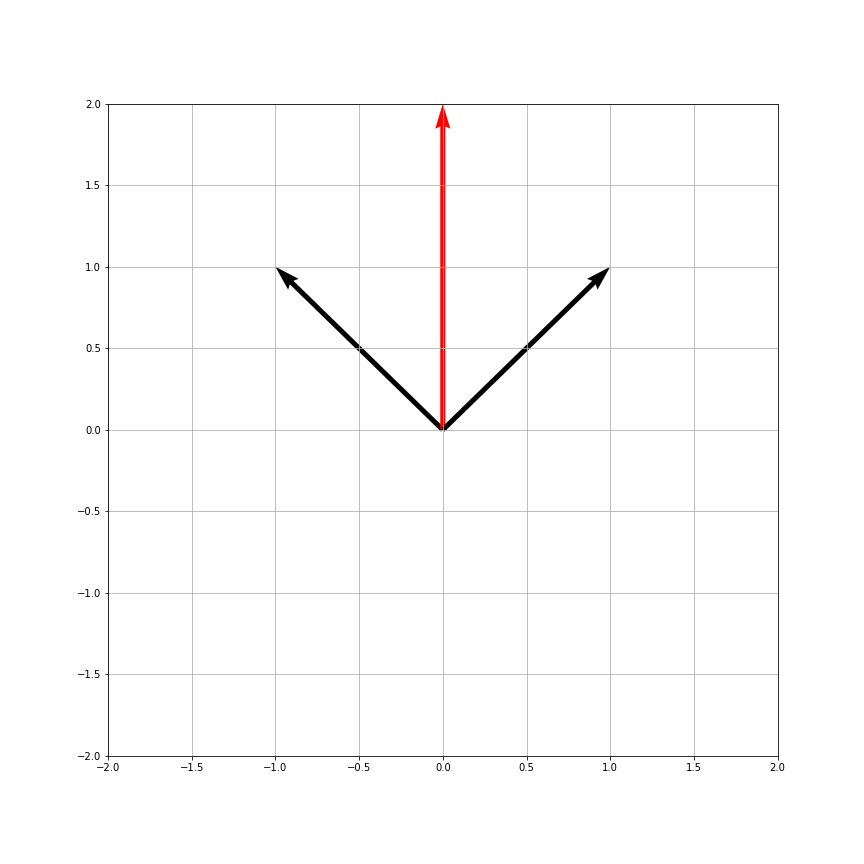

In [ ]:
#@title `Show/Hide code` { run: "auto" }

vectorValue = "[1, 1]" #@param {type:"string"}
vectorValue2 = "[-1, 1]" #@param {type:"string"}
color = "000000" #@param {type:"string"}

t = tf.constant(eval(vectorValue))
t2 = tf.constant(eval(vectorValue2))

fig = plt.figure(figsize=(12, 12))
plt.quiver(0, 0, t[0], t[1], angles='xy', scale_units='xy', scale=1, color="#"+color)
plt.quiver(0, 0, t2[0], t2[1], angles='xy', scale_units='xy', scale=1, color="#"+color, zorder=0)
plt.quiver(0, 0, t[0]+t2[0], t[1]+t2[1], angles='xy', scale_units='xy', scale=1, color="#ff0000", zorder=0)

l = 2*max(np.max(t),np.max(t2))
plt.xlim([-l, l])
plt.ylim([-l, l])
plt.grid()
plt.show()

<div class="markdown-google-sans">

However, the most significant operation we can perform with vectors is <b>Dot Product</b> between two of them.

Here, the result of the operation is not another Vector, is a scalar value that represents the product of one vector's magnitude times the projection of the other one over the first vector.

* $V\cdot W=|V|\cdot|W|\cdot cos(\alpha)$
* $\alpha$ equals the angle between $V$ and $W$ vectors

This idea makes sense if we try to define from scratch the product of 2 vectors. The first thing we would do is taking the product of both magnitudes of the vectors involved. But this would only work if both vectors have the same direction, that is, are located on the same line.

If they have different directions, what we do is generating a projection of one vector $V$ over the other one $W$ that we denote as $P$, so the resulting vector's magnitude $|P|$ will be the value we will use to compute the product with the other vector's magnitude $|W|$. 

That's the reason why $cos(\alpha)$ is present on the formal description.
</div>

Dot product=4


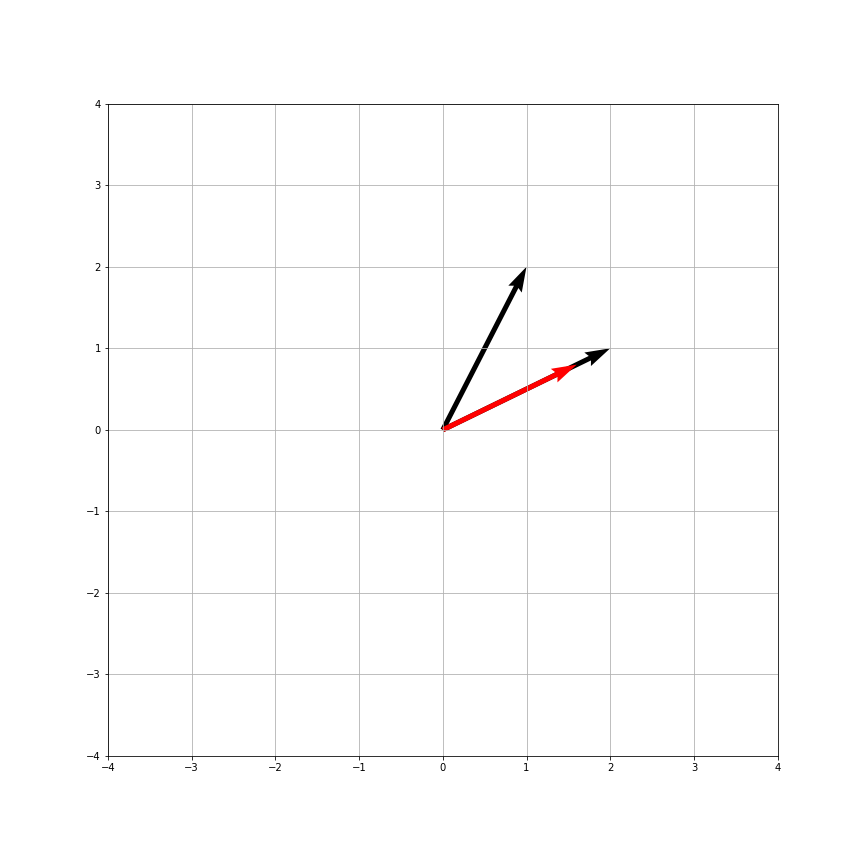

In [ ]:
#@title `Show/Hide code` { run: "auto" }

v = "[1, 2]" #@param {type:"string"}
w = "[2, 1]" #@param {type:"string"}
color = "000000" #@param {type:"string"}

t = tf.constant(eval(v))
t2 = tf.constant(eval(w))

dot = np.dot(t.numpy(), t2.numpy())
p = (dot / np.linalg.norm(t2.numpy())**2) * t2.numpy()
print(f"Dot product={dot}")

fig = plt.figure(figsize=(12, 12))
plt.quiver(0, 0, t[0], t[1], angles='xy', scale_units='xy', scale=1, color="#"+color)
plt.quiver(0, 0, t2[0], t2[1], angles='xy', scale_units='xy', scale=1, color="#"+color)
plt.quiver(0, 0, p[0], p[1], angles='xy', scale_units='xy', scale=1, color="#ff0000", zorder=1)

l = 2*max(np.max(t),np.max(t2))
plt.xlim([-l, l])
plt.ylim([-l, l])
plt.grid()
plt.show()

<div class="markdown-google-sans">

If we want to avoid having to create projection vectors, as shown above in red color, we have the option of computing the <b>summation of the element wise product of vector components</b>, which will be equivalent to the Dot Product.

* $V\cdot W=[a_0, a_1, a_2, a_3,....,a_n]\cdot \begin{bmatrix}b_0 \\b_1\\b_2 \\\vdots \\b_n\end{bmatrix} = \begin{bmatrix}a_0 \\a_1\\a_2 \\\vdots \\a_n\end{bmatrix}^t\cdot \begin{bmatrix}b_0 \\b_1\\b_2 \\\vdots \\b_n\end{bmatrix}$
* $V\cdot W= a_0b_0+a_1b_1+a_2b_2+...+a_nb_n$
</div>

<div class="markdown-google-sans">
<h2><b>Matrices</b></h2>

The first 2 operations of scalar multiplication and addition follow the same logic for matrices, using element wise traversals to modify the respective matrix elements or creating a new object.
</div>

(-3.0, 3.0)

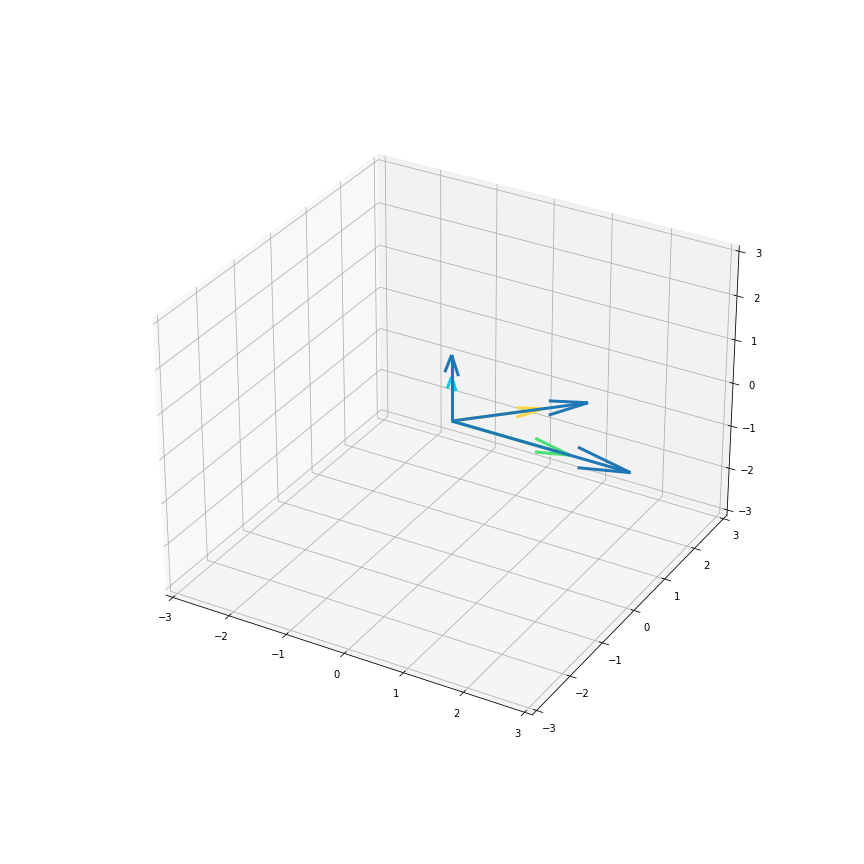

In [ ]:
#@title `Show/Hide code` { run: "auto" }
inputMatrix = "[[2, 1, 0], [0, 1, 0], [0, 0, 1]]" #@param {type:"string"}
inputScalar = "1.5" #@param {type:"string"}
matrix = tf.transpose(tf.constant(eval(inputMatrix), dtype=tf.float64))
colors = ["#48e073", "#f8d849", "#05c9f2"]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

for i in range(len(matrix)):
  ax.quiver(0, 0, 0, matrix[i][0], matrix[i][1], matrix[i][2], arrow_length_ratio=0.3, lw=3, color=colors[i]) 

matrix = tf.math.scalar_mul(eval(inputScalar), matrix)
for i in range(len(matrix)):
  ax.quiver(0, 0, 0, matrix[i][0], matrix[i][1], matrix[i][2], arrow_length_ratio=0.3, lw=3) 

l = np.max(matrix)
ax.set_xlim([-l, l])
ax.set_ylim([-l, l])
ax.set_zlim([-l, l])

(-2.0, 2.0)

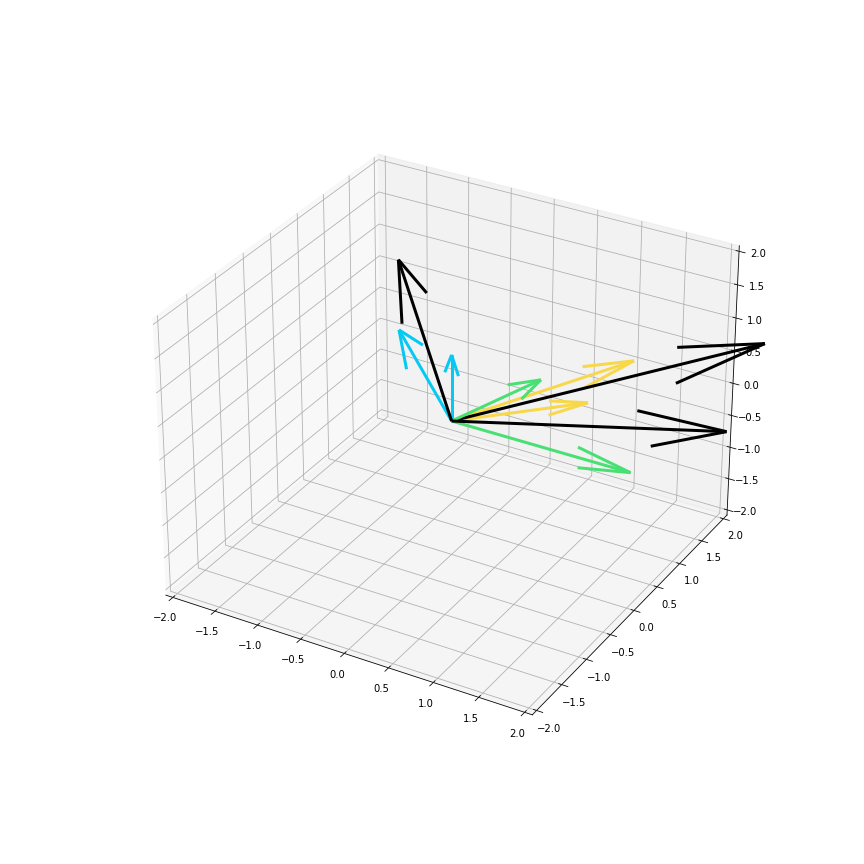

In [ ]:
#@title `Show/Hide code` { run: "auto" }
inputMatrix = "[[2, 1, 0], [0, 1, 0], [0, 0, 1]]" #@param {type:"string"}
inputMatrix2 = "[[1, 1, 0], [0, 2, -1], [1, 0, 2]]" #@param {type:"string"}
matrix = tf.transpose(tf.constant(eval(inputMatrix), dtype=tf.float64))
matrix2 = tf.transpose(tf.constant(eval(inputMatrix2), dtype=tf.float64))
colors = ["#48e073", "#f8d849", "#05c9f2"]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

for i in range(len(matrix)):
  ax.quiver(0, 0, 0, matrix[i][0], matrix[i][1], matrix[i][2], arrow_length_ratio=0.3, lw=3, color=colors[i]) 

for i in range(len(matrix2)):
  ax.quiver(0, 0, 0, matrix2[i][0], matrix2[i][1], matrix2[i][2], arrow_length_ratio=0.3, lw=3, color=colors[i]) 

s= tf.add(matrix, matrix2)
for i in range(len(s)):
  ax.quiver(0, 0, 0, s[i][0], s[i][1], s[i][2], arrow_length_ratio=0.3, lw=3, color="#000000") 

l = np.max(matrix)
ax.set_xlim([-l, l])
ax.set_ylim([-l, l])
ax.set_zlim([-l, l])

<div class="markdown-google-sans">

However, when we try to compute the product of 2 matrices, we notice that the amount of entries and their size respectively varies across all possible matrices. So, we have to redefine the product operation according to the structure of a matrix object and its potential use cases.

First, let's start with the product of 2 <b>"vector sized matrices"</b>:
*  $M\cdot N=[a_0, a_1, a_2, a_3,....,a_n]\cdot \begin{bmatrix}b_0 \\b_1\\b_2 \\\vdots \\b_n\end{bmatrix} = \begin{bmatrix}a_0 \\a_1\\a_2 \\\vdots \\a_n\end{bmatrix}^t\cdot \begin{bmatrix}b_0 \\b_1\\b_2 \\\vdots \\b_n\end{bmatrix}=[a_0b_0+a_1b_1+a_2b_2+...+a_nb_n]$

As you can see, if we consider both matrices as single  vectors, they would require to have the same amount of components to correctly perform the product. Above, both have $n$ entries, so they are product compatible.

Nevertheless, you may have already noticed that the result consists of the <b>Dot Product</b> between $M$ and $N$, which the notation shows as <b>a transposed column vector $M$ times another column vector $N$</b>.

The reason why the left side column vector needs to be transposed on the product appears when we try to analyze the following matrix products:

* $M\cdot N=[a_{00}, a_{01},a_{02},a_{03},....,a_{0n}]\cdot \begin{bmatrix}b_{00}&b_{01} \\b_{10}&b_{11}\\b_{20}&b_{21} \\\vdots&\vdots \\b_{n0}&b_{n1}\end{bmatrix} =[a_{00}b_{00}+a_{01}b_{10}+...+a_{0n}b_{n0}, a_{00}b_{01}+a_{01}b_{11}+...+a_{0n}b_{n1}]$
* $M\cdot N=[a_{00}, a_{01},a_{02},a_{03},....,a_{0n}]\cdot \begin{bmatrix}b_{00}&b_{01}\cdots b_{0m} \\b_{10}&b_{11}\cdots b_{1m}\\b_{20}&b_{21}\cdots b_{2m} \\\vdots&\vdots \\b_{n0}&b_{n1}\cdots b_{nm} \end{bmatrix} =[a_{00}b_{00}+a_{01}b_{10}+...+a_{0n}b_{n0}, a_{00}b_{01}+a_{01}b_{11}+...+a_{0n}b_{n1}, ....., a_{00}b_{0m}+a_{01}b_{1m}+...+a_{0n}b_{nm}]$

This last example shows the way we perform the product when the left size matrix has 1 vector entry with $n$ elements inside it and the right side matrix has $n$ m-sized entry vectors. Here, the resulting matrix will have as much elements as <b>horizontal vector components</b> in the right side matrix. 

Each one of these elements $a_i$ will be the Dot Product between $M$ and the corresponding $i$ column vector of $N$.

* $M\cdot N=\begin{bmatrix}a_{00}&a_{01}&&a_{02}\cdots a_{0m}\\ a_{10}&a_{11}&&a_{12}\cdots a_{1m}\\ a_{20}&a_{21}&&a_{22}\cdots a_{2m}\\\vdots&\vdots\\ a_{n0}&a_{n1}&&a_{n2}\cdots a_{nm}\end{bmatrix}\cdot \begin{bmatrix}b_{00}\\ b_{10}\\ b_{20}\\\vdots\\ b_{m0}\end{bmatrix}=\begin{bmatrix}a_{00}b_{00}+a_{01}b_{10}+...+a_{0m}b_{m0}\\a_{10}b_{00}+a_{11}b_{10}+...+a_{1m}b_{m0}\\a_{20}b_{00}+a_{21}b_{10}+...+a_{2m}b_{m0}\\\vdots\\a_{n0}b_{00}+a_{n1}b_{10}+...+a_{nm}b_{m0}\end{bmatrix}$

In the opposite case, when the left side matrix has n vectors with m components each and the right side has n vectors with 1 entry each, the product results in a column vector instead of an horizontal one, containing all the Dot Products of all the vector entries in $M$ by the column vector $N$.

* $M\cdot N=\begin{bmatrix}a_{00}&a_{01}&&a_{02}\cdots a_{0m}\\ a_{10}&a_{11}&&a_{12}\cdots a_{1m}\\ a_{20}&a_{21}&&a_{22}\cdots a_{2m}\\\vdots&\vdots\\ a_{n0}&a_{n1}&&a_{n2}\cdots a_{nm}\end{bmatrix}\cdot \begin{bmatrix}b_{00}&b_{01}&&b_{02}\cdots b_{0i}\\ b_{10}&b_{11}&&b_{12}\cdots b_{1i}\\ b_{20}&b_{21}&&b_{22}\cdots b_{2i}\\\vdots&\vdots\\ b_{m0}&b_{m1}&&b_{m2}\cdots b_{mi}\end{bmatrix}=\begin{bmatrix}a_{00}b_{00}+a_{01}b_{10}+...+a_{0m}b_{m0}\cdots\cdots a_{00}b_{0i}+a_{01}b_{1i}+...+a_{0m}b_{mi}\\a_{10}b_{00}+a_{11}b_{10}+...+a_{1m}b_{m0}\cdots\cdots a_{10}b_{0i}+a_{11}b_{1i}+...+a_{1m}b_{mi}\\a_{20}b_{00}+a_{21}b_{10}+...+a_{2m}b_{m0}\cdots\cdots a_{20}b_{0i}+a_{21}b_{1i}+...+a_{2m}b_{mi}\\\vdots\\a_{n0}b_{00}+a_{n1}b_{10}+...+a_{nm}b_{m0}\cdots\cdots a_{n0}b_{0i}+a_{n1}b_{1i}+...+a_{nm}b_{mi}\end{bmatrix}$

Finally, the above generalization represents the result of multiplying an $n\times m$ matrix times an $m\times i$ matrix, which gives another $n\times i$ matrix with all the corresponding Dot Products of horizontal and column vectors.
</div>

In [ ]:
#@title `Show/Hide code` { run: "auto" }
inputMatrix = "[[2, 1, 0], [0, 1, 0], [0, 0, 1]]" #@param {type:"string"}
inputMatrix2 = "[[1, 1, 0], [0, 2, -1], [1, 0, 2]]" #@param {type:"string"}
matrix = tf.transpose(tf.constant(eval(inputMatrix), dtype=tf.float64))
matrix2 = tf.transpose(tf.constant(eval(inputMatrix2), dtype=tf.float64))

print(f"M={matrix}\n\nN={matrix2}\n\nM*N={tf.matmul(matrix, matrix2)}")

M=[[2. 0. 0.]
 [1. 1. 0.]
 [0. 0. 1.]]

N=[[ 1.  0.  1.]
 [ 1.  2.  0.]
 [ 0. -1.  2.]]

M*N=[[ 2.  0.  2.]
 [ 2.  2.  1.]
 [ 0. -1.  2.]]


<div class="markdown-google-sans">
<h2><b>Determinants</b></h2>

When working with matrices, we can perform an specific operation called <b>Determinant</b>, which help us determine (only in square matrices) the <b>n-space held by the column vectors of a matrix</b>. 

* $\begin{vmatrix} a\end{vmatrix}=a$

In the first dimension $\mathbb {R}^1$, the determinant refers to the magnitude of the vector $V=[a]$
* $\begin{vmatrix} a&b\\c&d\end{vmatrix}=ad-cb$

In $\mathbb {R}^2$, the resulting scalar value represents the area of the parallelogram  made up from the two column vectors $V=\begin{bmatrix}a\\c\end{bmatrix} , W=\begin{bmatrix}b\\d\end{bmatrix}$
</div>

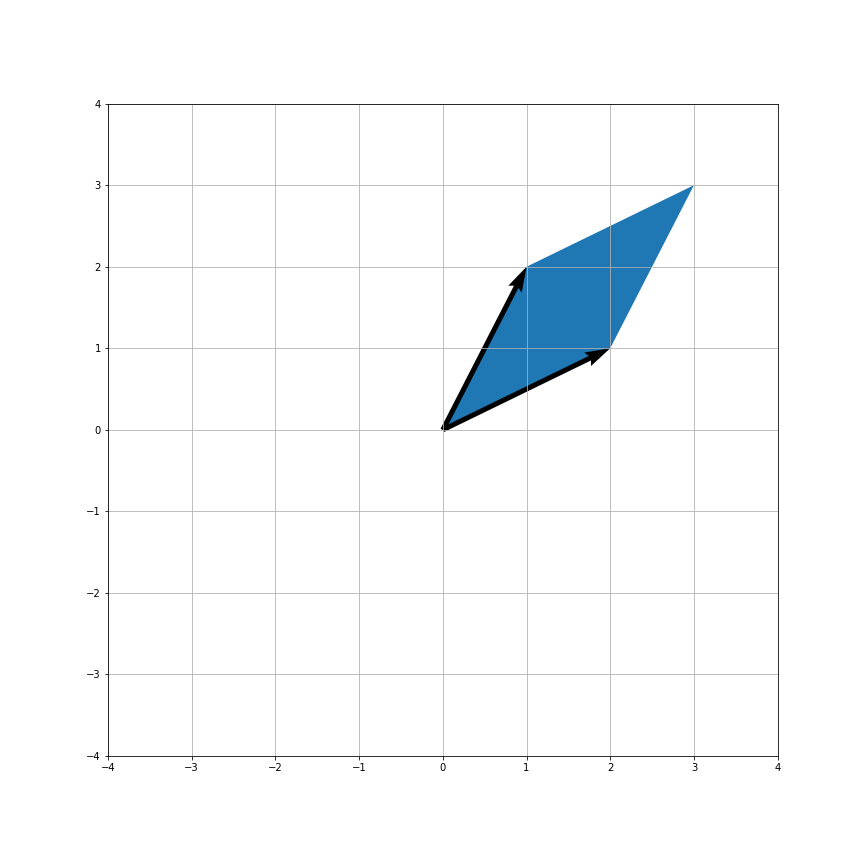

In [ ]:
#@title `Show/Hide code` { run: "auto" }

v = "[1, 2]" #@param {type:"string"}
w = "[2, 1]" #@param {type:"string"}
color = "000000" #@param {type:"string"}

t = tf.constant(eval(v))
t2 = tf.constant(eval(w))

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot()
plt.quiver(0, 0, t[0], t[1], angles='xy', scale_units='xy', scale=1, color="#"+color)
plt.quiver(0, 0, t2[0], t2[1], angles='xy', scale_units='xy', scale=1, color="#"+color)

ax.add_patch(patches.Polygon([[0, 0],t, t+t2, t2, [0, 0]], fill=1, zorder=-2))

l = 2*max(np.max(t),np.max(t2))
plt.xlim([-l, l])
plt.ylim([-l, l])
plt.grid()
plt.show()

<div class="markdown-google-sans">

For $\mathbb {R}^3$, we need to use the <b>Rule of Sarrus</b> to calculate the area enclosed by the 3 column vectors of the matrix as follows:
* $\begin{vmatrix} a&b&c\\d&e&f\\g&h&i\end{vmatrix}=aei+bfg+dhc-ceg-fha-dbi$

From $\mathbb {R}^4$ to $\mathbb {R}^n$, it's widely used the recursive definition of determinant to avoid having to compute large specific sets of scalar operations for each dimension.

*
</div>

(-2.0, 2.0)

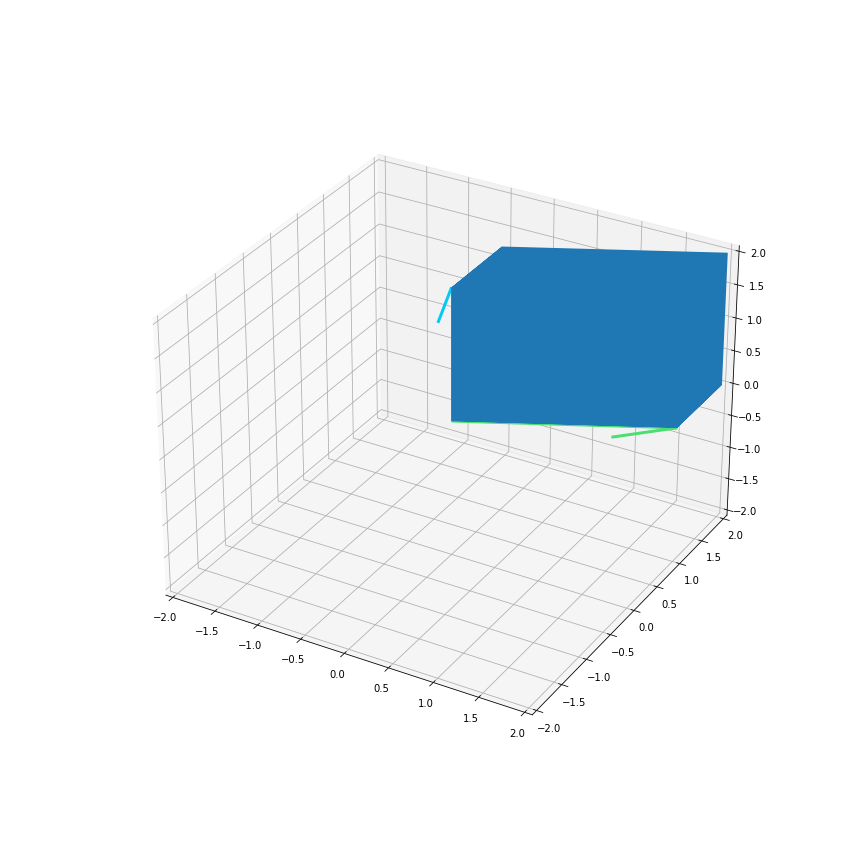

In [ ]:
#@title `Show/Hide code` { run: "auto" }
inputMatrix = "[[2, 1, 0], [0, 1, 0], [0, 0, 2]]" #@param {type:"string"}
matrix = tf.constant(eval(inputMatrix))
colors = ["#48e073", "#f8d849", "#05c9f2"]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

for i in range(len(matrix)):
  ax.quiver(0, 0, 0, matrix[i][0], matrix[i][1], matrix[i][2], arrow_length_ratio=0.3, lw=3, color=colors[i]) 
ax.add_collection3d(Poly3DCollection([[[0, 0, 0], matrix[0], matrix[0]+matrix[1], matrix[1], 
                                       [0, 0, 0], matrix[1], matrix[1]+matrix[2], matrix[2],
                                       [0, 0, 0], matrix[0], matrix[2]+matrix[0], matrix[2],
                                       [0, 0, 0], matrix[0], matrix[0]+matrix[1], matrix[0]+matrix[1]+matrix[2], matrix[2]+matrix[0],
                                       matrix[0], [0, 0, 0], matrix[2], matrix[0]+matrix[2], matrix[0]+matrix[1]+matrix[2], matrix[2]+matrix[1], matrix[2]]]))

l = np.max(matrix)
ax.set_xlim([-l, l])
ax.set_ylim([-l, l])
ax.set_zlim([-l, l])

<div class="markdown-google-sans">
<h2><b>Applications of Matrix Product</b></h2>

The main use cases of matrix product in linear algebra overall is the resolution of linear systems of equations. But, before we proceed detailing the process, it's required to have at least a rough idea of the resulting matrix product when dealing with arbitrary and specific matrices.

* $I=\begin{bmatrix} 1&0&0&\cdots&0\\0&1&0&\cdots&0\\0&0&1&\cdots&0\\\vdots&\vdots&\vdots&\ddots&\vdots\\0&0&0&\cdots&1\end{bmatrix} \in \mathbb{M}_{n\times n}$
* $I\cdot A=A$
</div>

##**A vector space in Tensorflow**

(-1.0, 1.0)

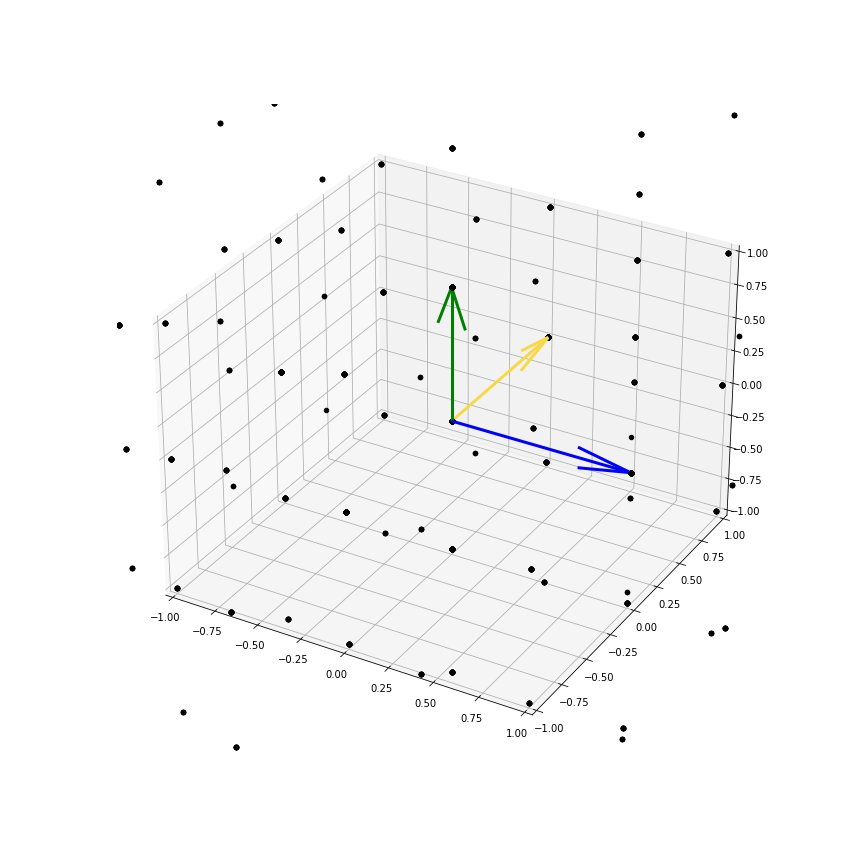

In [ ]:
origin = tf.constant([0, 0, 0])
vectors = tf.constant([[0, 0, 1], 
                       [0, 1, 0], 
                       [1, 0, 0]])

colors = ["g", "#f8d849", "b"]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

for i in range(len(vectors)):
  ax.quiver(origin[0], origin[1], origin[2], vectors[i][0], vectors[i][1], vectors[i][2], arrow_length_ratio=0.3, lw=3, color=colors[i]) 

r = np.linspace(-2, 2, 10)
for i1 in r:
  for i2 in r:
    for i3 in r:
      v = np.array([0, 0, 0])
      for index in range(len(vectors)):
        v = np.add(v, eval("i"+str(index+1))*vectors[index])
      ax.scatter(v[0], v[1], v[2], color="k") 

l = np.max(vectors)
ax.set_xlim([-l, l])
ax.set_ylim([-l, l])
ax.set_zlim([-l, l])